In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
df=pd.read_csv('file:///F:/example_data.csv')
df.head()

,month,variable,sex,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan
0,1976-01,Employment,Both sexes,819.5,1029.7,427.4,229.6,162.4,303.0,3707.4,42.7,2545.4,369.5
1,1976-01,Employment,Females,307.1,379.3,164.9,84.3,50.8,110.3,1426.7,16.5,879.5,131.9
2,1976-01,Employment,Males,512.5,650.4,262.6,145.3,111.6,192.7,2280.7,26.2,1665.9,237.6
3,1976-01,Full-time employment,Both sexes,693.7,877.1,369.0,201.7,150.0,265.4,3209.1,37.2,2315.6,312.2
4,1976-01,Full-time employment,Females,217.9,274.6,119.8,62.7,42.1,84.6,1084.1,12.7,727.0,93.3


In [3]:
df=df.drop(['month'],axis='columns')

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le=LabelEncoder()

In [6]:
df['sex']=le.fit_transform(df['sex'])

In [7]:
df.head()

,variable,sex,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan
0,Employment,0,819.5,1029.7,427.4,229.6,162.4,303.0,3707.4,42.7,2545.4,369.5
1,Employment,1,307.1,379.3,164.9,84.3,50.8,110.3,1426.7,16.5,879.5,131.9
2,Employment,2,512.5,650.4,262.6,145.3,111.6,192.7,2280.7,26.2,1665.9,237.6
3,Full-time employment,0,693.7,877.1,369.0,201.7,150.0,265.4,3209.1,37.2,2315.6,312.2
4,Full-time employment,1,217.9,274.6,119.8,62.7,42.1,84.6,1084.1,12.7,727.0,93.3


In [8]:
df.shape

(4743, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   variable                   4743 non-null   object 
 1   sex                        4743 non-null   int32  
 2   Alberta                    4743 non-null   float64
 3   British Columbia           4743 non-null   float64
 4   Manitoba                   4743 non-null   float64
 5   New Brunswick              4743 non-null   float64
 6   Newfoundland and Labrador  4743 non-null   float64
 7   Nova Scotia                4743 non-null   float64
 8   Ontario                    4743 non-null   float64
 9   Prince Edward Island       4743 non-null   float64
 10  Quebec                     4743 non-null   float64
 11  Saskatchewan               4743 non-null   float64
dtypes: float64(10), int32(1), object(1)
memory usage: 426.3+ KB


In [12]:
df.describe()

,sex,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan
count,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000
mean,1.000000,703.887265,800.188762,240.903711,138.196268,90.227367,175.255851,2474.794476,26.754628,1497.215728,213.303205
std,0.816583,535.813558,569.147095,163.037391,97.968014,64.912464,120.604219,1747.167232,18.946446,1054.336810,144.443129
min,0.000000,31.200000,40.400000,13.300000,4.900000,3.300000,9.500000,141.700000,1.500000,66.000000,15.600000
25%,0.000000,251.900000,325.150000,95.150000,44.950000,25.150000,61.400000,876.200000,8.950000,511.500000,91.800000
50%,1.000000,633.200000,724.200000,236.800000,140.000000,92.000000,174.200000,2345.400000,26.500000,1491.600000,208.800000
75%,2.000000,1028.800000,1092.350000,320.150000,178.300000,117.000000,226.500000,3408.600000,36.450000,2045.750000,281.400000
max,2.000000,2358.000000,2578.400000,657.700000,364.300000,246.500000,468.900000,7519.200000,79.000000,4379.600000,583.100000


In [14]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
sex,11.0,-0.267037,0.420500,-0.412230,-0.401226,-0.396667,-0.385345,1.0
Alberta,11.0,0.850621,0.400626,-0.356349,0.959543,0.963299,0.980557,1.0
British Columbia,11.0,0.856324,0.414391,-0.392612,0.972543,0.977887,0.988275,1.0
Manitoba,11.0,0.863001,0.421989,-0.408925,0.984121,0.993266,0.996769,1.0
New Brunswick,11.0,0.863429,0.418075,-0.396667,0.983150,0.992101,0.995189,1.0
Newfoundland and Labrador,11.0,0.858557,0.411775,-0.381962,0.968997,0.990356,0.991807,1.0
Nova Scotia,11.0,0.862813,0.423037,-0.412230,0.984620,0.993130,0.996625,1.0
Ontario,11.0,0.865012,0.419089,-0.398462,0.984656,0.992085,0.994961,1.0
Prince Edward Island,11.0,0.864701,0.420830,-0.403989,0.986461,0.993266,0.996063,1.0
Quebec,11.0,0.866868,0.416497,-0.388728,0.987640,0.995084,0.996755,1.0


In [16]:
df.isna().sum()

variable                     0
sex                          0
Alberta                      0
British Columbia             0
Manitoba                     0
New Brunswick                0
Newfoundland and Labrador    0
Nova Scotia                  0
Ontario                      0
Prince Edward Island         0
Quebec                       0
Saskatchewan                 0
dtype: int64

In [17]:
df.max()

variable                     Part-time employment 
sex                                              2
Alberta                                     2358.0
British Columbia                            2578.4
Manitoba                                     657.7
New Brunswick                                364.3
Newfoundland and Labrador                    246.5
Nova Scotia                                  468.9
Ontario                                     7519.2
Prince Edward Island                          79.0
Quebec                                      4379.6
Saskatchewan                                 583.1
dtype: object

In [18]:
df.min()

variable                     Employment
sex                                   0
Alberta                            31.2
British Columbia                   40.4
Manitoba                           13.3
New Brunswick                       4.9
Newfoundland and Labrador           3.3
Nova Scotia                         9.5
Ontario                           141.7
Prince Edward Island                1.5
Quebec                             66.0
Saskatchewan                       15.6
dtype: object

In [19]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


sex                             1.000000
Alberta                       703.887265
British Columbia              800.188762
Manitoba                      240.903711
New Brunswick                 138.196268
Newfoundland and Labrador      90.227367
Nova Scotia                   175.255851
Ontario                      2474.794476
Prince Edward Island           26.754628
Quebec                       1497.215728
Saskatchewan                  213.303205
dtype: float64

In [21]:
df.dtypes

variable                      object
sex                            int32
Alberta                      float64
British Columbia             float64
Manitoba                     float64
New Brunswick                float64
Newfoundland and Labrador    float64
Nova Scotia                  float64
Ontario                      float64
Prince Edward Island         float64
Quebec                       float64
Saskatchewan                 float64
dtype: object

In [22]:
df.columns

Index(['variable', 'sex', 'Alberta', 'British Columbia', 'Manitoba',
       'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan'],
      dtype='object')

In [24]:
x=df.drop(['variable'],axis='columns')

In [25]:
y=df.variable.values

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [27]:
tre=DecisionTreeClassifier()

In [28]:
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest,pred_tre)*100
accu_tre

99.29725931131412

In [29]:
print(classification_report(ytest,pred_tre))

                       precision    recall  f1-score   support

           Employment       0.99      1.00      0.99       470
 Full-time employment       0.99      0.99      0.99       492
Part-time employment        1.00      1.00      1.00       461

             accuracy                           0.99      1423
            macro avg       0.99      0.99      0.99      1423
         weighted avg       0.99      0.99      0.99      1423



In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest,pred_kne)*100
accu_kne

100.0

In [32]:
print(classification_report(ytest,pred_kne))

                       precision    recall  f1-score   support

           Employment       1.00      1.00      1.00       470
 Full-time employment       1.00      1.00      1.00       492
Part-time employment        1.00      1.00      1.00       461

             accuracy                           1.00      1423
            macro avg       1.00      1.00      1.00      1423
         weighted avg       1.00      1.00      1.00      1423



In [33]:
from sklearn.ensemble import AdaBoostClassifier

In [35]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pred_ada)*100
accu_ada

70.41461700632466

In [36]:
print(classification_report(ytest,pred_ada))

                       precision    recall  f1-score   support

           Employment       0.53      1.00      0.69       470
 Full-time employment       0.96      0.15      0.26       492
Part-time employment        1.00      1.00      1.00       461

             accuracy                           0.70      1423
            macro avg       0.83      0.71      0.65      1423
         weighted avg       0.83      0.70      0.64      1423



In [37]:
from sklearn.ensemble import BaggingClassifier

In [38]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest,pred_bag)*100
accu_bag

99.15671117357695

In [39]:
print(classification_report(ytest,pred_bag))

                       precision    recall  f1-score   support

           Employment       0.98      1.00      0.99       470
 Full-time employment       0.99      0.98      0.99       492
Part-time employment        1.00      1.00      1.00       461

             accuracy                           0.99      1423
            macro avg       0.99      0.99      0.99      1423
         weighted avg       0.99      0.99      0.99      1423



In [40]:
from sklearn.naive_bayes import GaussianNB

In [42]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pre_gau=gau.predict(xtest)
accu_gau=accuracy_score(ytest,pre_gau)*100
accu_gau

65.63598032326071

In [43]:
print(classification_report(ytest,pre_gau))

                       precision    recall  f1-score   support

           Employment       0.50      0.35      0.41       470
 Full-time employment       0.50      0.63      0.56       492
Part-time employment        0.96      1.00      0.98       461

             accuracy                           0.66      1423
            macro avg       0.65      0.66      0.65      1423
         weighted avg       0.65      0.66      0.65      1423



In [44]:
from sklearn.ensemble import ExtraTreesClassifier

In [45]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pre_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pre_etc)*100
accu_etc

100.0

In [46]:
print(classification_report(ytest,pre_etc))

                       precision    recall  f1-score   support

           Employment       1.00      1.00      1.00       470
 Full-time employment       1.00      1.00      1.00       492
Part-time employment        1.00      1.00      1.00       461

             accuracy                           1.00      1423
            macro avg       1.00      1.00      1.00      1423
         weighted avg       1.00      1.00      1.00      1423



In [47]:
from sklearn.svm import SVC

In [48]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_svc=svc.predict(xtest)
accu_svc=accuracy_score(ytest,pre_svc)*100
accu_svc

77.65284609978917

In [49]:
print(classification_report(ytest,pre_svc))

                       precision    recall  f1-score   support

           Employment       0.67      0.77      0.72       470
 Full-time employment       0.72      0.57      0.64       492
Part-time employment        0.94      1.00      0.97       461

             accuracy                           0.78      1423
            macro avg       0.78      0.78      0.77      1423
         weighted avg       0.77      0.78      0.77      1423



In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rnd=RandomForestClassifier()
rnd.fit(xtrain,ytrain)
pre_rnd=rnd.predict(xtest)
accu_rnd=accuracy_score(ytest,pre_rnd)*100
accu_rnd

99.78917779339423

In [52]:
print(classification_report(ytest,pre_rnd))

                       precision    recall  f1-score   support

           Employment       1.00      1.00      1.00       470
 Full-time employment       1.00      1.00      1.00       492
Part-time employment        1.00      1.00      1.00       461

             accuracy                           1.00      1423
            macro avg       1.00      1.00      1.00      1423
         weighted avg       1.00      1.00      1.00      1423



In [53]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)
pred_lo=lo.predict(xtest)
accu_lo=accuracy_score(ytest,pred_lo)*100
accu_lo

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


88.12368236120871

In [54]:
print(classification_report(ytest,pred_lo))

                       precision    recall  f1-score   support

           Employment       0.80      0.85      0.83       470
 Full-time employment       0.90      0.86      0.88       492
Part-time employment        0.95      0.93      0.94       461

             accuracy                           0.88      1423
            macro avg       0.88      0.88      0.88      1423
         weighted avg       0.88      0.88      0.88      1423



In [55]:
models = pd.DataFrame({
    'Model': ['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier' , 
             'AdaBoostClassifier','BaggingClassifier','GaussianNB','AdaBoostClassifier','ExtraTreesClassifier','SVM','RandomForestClassifier'],
    'Score': [accu_lo,accu_tre, accu_kne, accu_ada,accu_bag,accu_gau,accu_ada,accu_etc,accu_svc,accu_rnd]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,KNeighborsClassifier,100.000000
7,ExtraTreesClassifier,100.000000
9,RandomForestClassifier,99.789178
1,DecisionTreeClassifier,99.297259
4,BaggingClassifier,99.156711
0,LogisticRegression,88.123682
8,SVM,77.652846
3,AdaBoostClassifier,70.414617
6,AdaBoostClassifier,70.414617
5,GaussianNB,65.635980


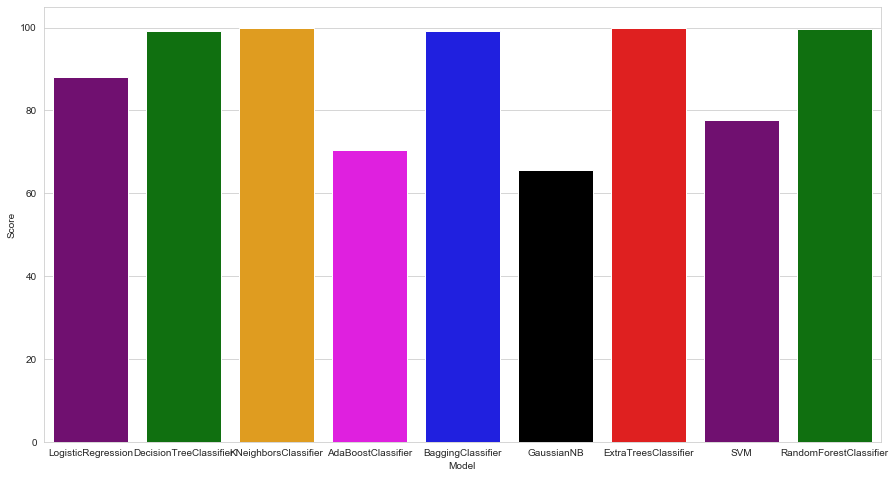

In [58]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [59]:
df.head()

,variable,sex,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan
0,Employment,0,819.5,1029.7,427.4,229.6,162.4,303.0,3707.4,42.7,2545.4,369.5
1,Employment,1,307.1,379.3,164.9,84.3,50.8,110.3,1426.7,16.5,879.5,131.9
2,Employment,2,512.5,650.4,262.6,145.3,111.6,192.7,2280.7,26.2,1665.9,237.6
3,Full-time employment,0,693.7,877.1,369.0,201.7,150.0,265.4,3209.1,37.2,2315.6,312.2
4,Full-time employment,1,217.9,274.6,119.8,62.7,42.1,84.6,1084.1,12.7,727.0,93.3


In [60]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans 

In [61]:
kmns=cluster.KMeans(n_clusters=5)

In [62]:
kmns=kmns.fit(df[['sex','Alberta']])

In [63]:
kmns.cluster_centers_

array([[0.00000000e+00, 1.91655333e+03],
       [1.48395270e+00, 7.13796284e+02],
       [1.23828756e+00, 1.40819386e+02],
       [6.97429907e-01, 3.81967290e+02],
       [8.19138756e-01, 1.13603033e+03]])

In [64]:
df['sex by Alberta']=kmns.labels_

In [65]:
k_range=range(1,15)
wss=[]

In [67]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['sex','Alberta']])
    wss.append(km.inertia_)

In [68]:
wss

[1361413196.1908329,
 442361203.3658592,
 185744981.81380844,
 88665303.05629563,
 66960753.78996722,
 46139022.110093445,
 31995401.860590186,
 25352534.642232426,
 20166470.592951547,
 15530391.10748056,
 12551268.859312544,
 10559610.103527326,
 8844632.791685287,
 7712753.493594691]

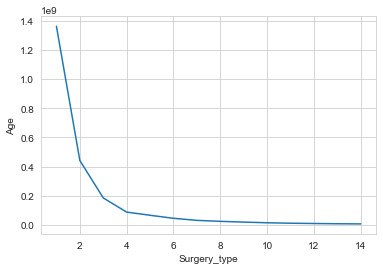

In [70]:
plt.ylabel('Age')
plt.xlabel('Surgery_type')
plt.plot(k_range,wss)

In [71]:
kmns=cluster.KMeans(n_clusters=5)

In [72]:
kmns=kmns.fit(df[['sex','British Columbia']])

In [73]:
kmns.cluster_centers_

array([[1.11118090e+00, 2.29923367e+02],
       [0.00000000e+00, 1.64885438e+03],
       [1.24672321e+00, 1.06374603e+03],
       [0.00000000e+00, 2.18093457e+03],
       [1.17897480e+00, 6.49265421e+02]])

In [74]:
df['sex by British Columbia']=kmns.labels_

In [75]:
k_range=range(1,17)
wss=[]

In [77]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['sex','British Columbia']])
    wss.append(km.inertia_)

In [78]:
wss

[1536071707.0710354,
 519121687.49861115,
 191194208.06829274,
 114534130.98301694,
 76630206.6570095,
 52095351.276383996,
 37276873.360315226,
 28395096.83945486,
 21539626.96286357,
 17016212.856409773,
 14257341.964075048,
 12281533.041405957,
 10598466.615448734,
 8972344.015354259,
 7573444.957171144,
 6460974.57419387]

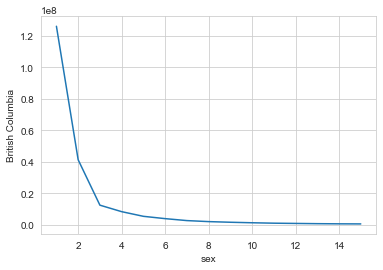

In [87]:
plt.xlabel('sex')
plt.ylabel('British Columbia')
plt.plot(k_range,wss)

In [80]:
kmns=cluster.KMeans(n_clusters=5)

In [81]:
kmns=kmns.fit(df[['sex','Manitoba']])

In [82]:
kmns.cluster_centers_

array([[  1.68888889, 273.24156863],
       [  0.        , 554.56699029],
       [  1.26581265,  57.36773419],
       [  0.        , 428.13858998],
       [  0.63516484, 150.02824176]])

In [83]:
df['sex by Manitoba']=km.labels_

In [84]:
k_range=range(1,16)
wss=[]

In [85]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['sex','Manitoba']])
    wss.append(km.inertia_)

In [86]:
wss

[126051169.27469112,
 41233644.11166449,
 12383871.754476685,
 8259239.304130839,
 5297176.599528659,
 3823002.6009607734,
 2584314.4565894147,
 1936806.9097608055,
 1529071.3505458212,
 1204184.232500292,
 932154.7367490926,
 776693.8412659292,
 624016.6030034359,
 525634.7394043405,
 469601.8372370535]

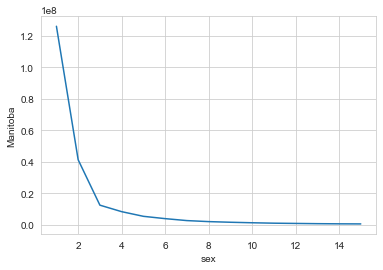

In [88]:
plt.xlabel('sex')
plt.ylabel('Manitoba')
plt.plot(k_range,wss)

In [89]:
df.head()

,variable,sex,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan,sex by Alberta,sex by British Columbia,sex by Manitoba
0,Employment,0,819.5,1029.7,427.4,229.6,162.4,303.0,3707.4,42.7,2545.4,369.5,1,2,5
1,Employment,1,307.1,379.3,164.9,84.3,50.8,110.3,1426.7,16.5,879.5,131.9,3,0,13
2,Employment,2,512.5,650.4,262.6,145.3,111.6,192.7,2280.7,26.2,1665.9,237.6,3,4,11
3,Full-time employment,0,693.7,877.1,369.0,201.7,150.0,265.4,3209.1,37.2,2315.6,312.2,1,2,15
4,Full-time employment,1,217.9,274.6,119.8,62.7,42.1,84.6,1084.1,12.7,727.0,93.3,2,0,6


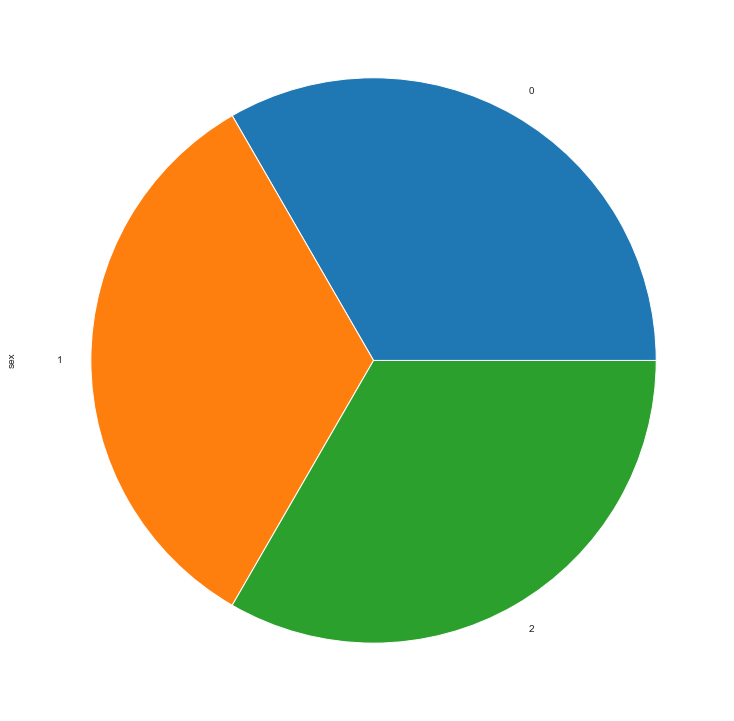

In [90]:
plt.figure(figsize = (15,13))
df.sex.value_counts().plot(kind='pie')

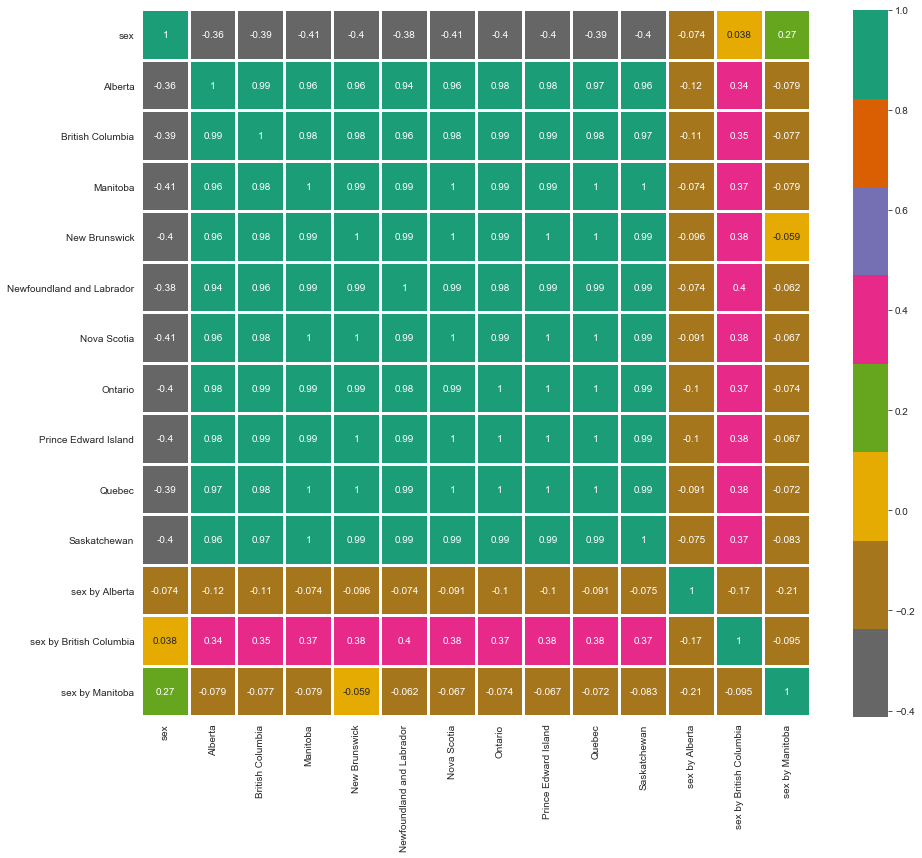

In [94]:
plt.figure(figsize=(15,13))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

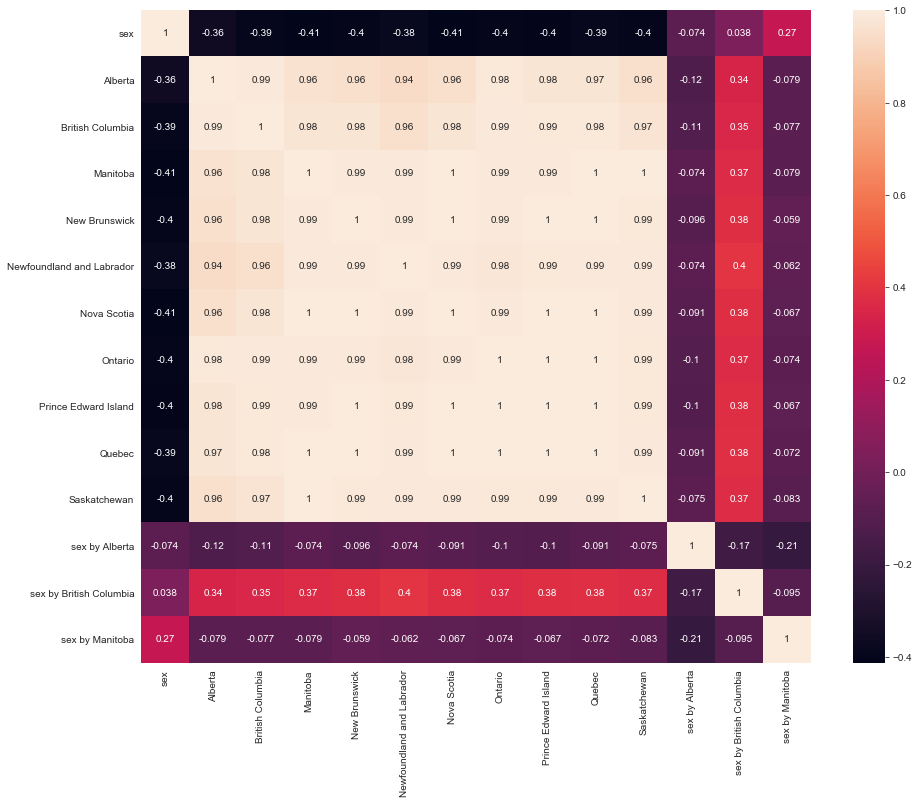

In [91]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

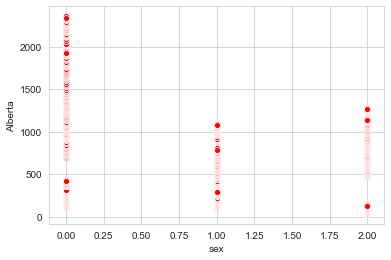

In [93]:
sns.scatterplot(x='sex',y='Alberta',data=df,color='red')

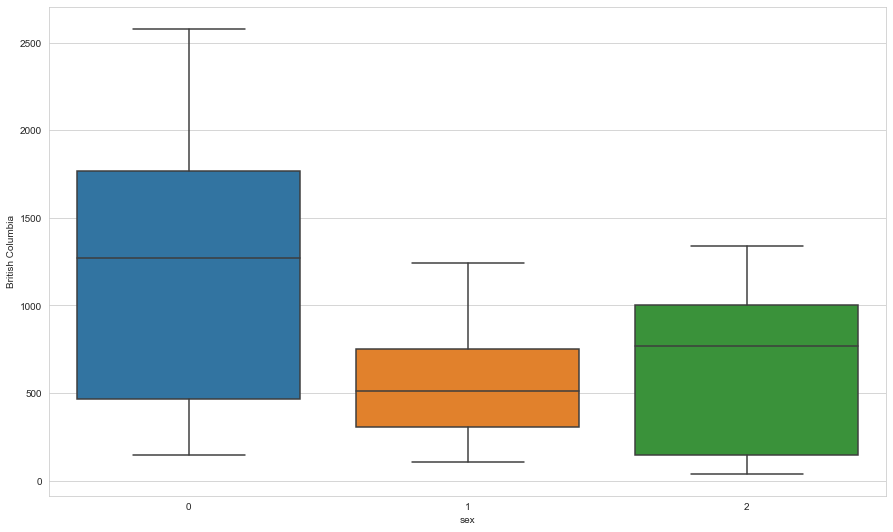

In [95]:
plt.figure(figsize=(15,9))
sns.boxplot(x='sex',y='British Columbia',data=df)

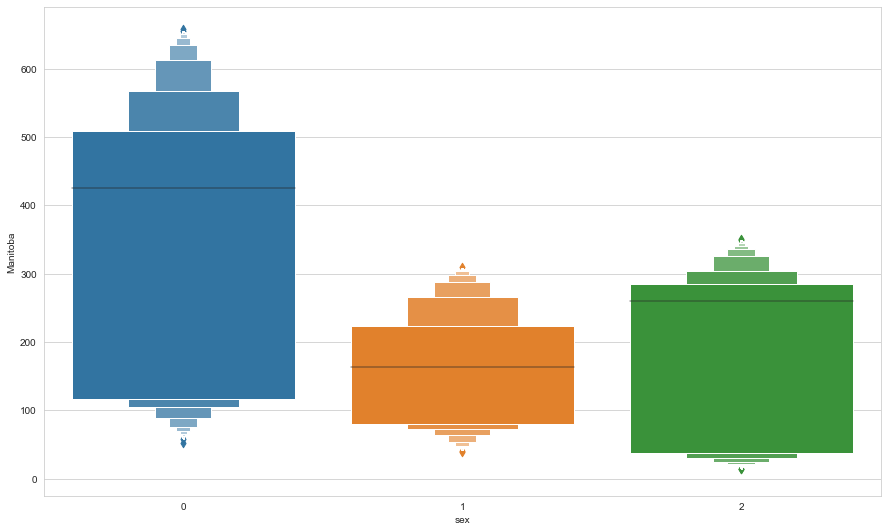

In [96]:
plt.figure(figsize=(15,9))
sns.boxenplot(x='sex',y='Manitoba',data=df)

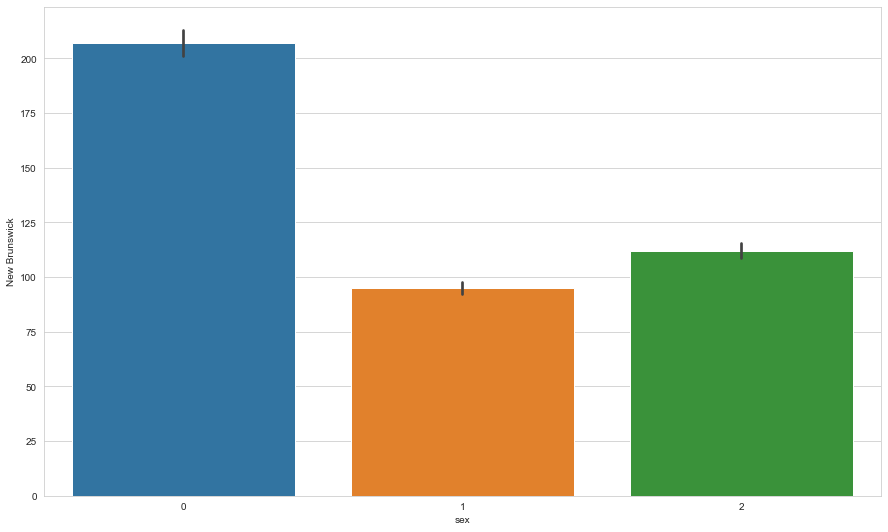

In [97]:
plt.figure(figsize=(15,9))
sns.barplot(x='sex',y='New Brunswick',data=df)

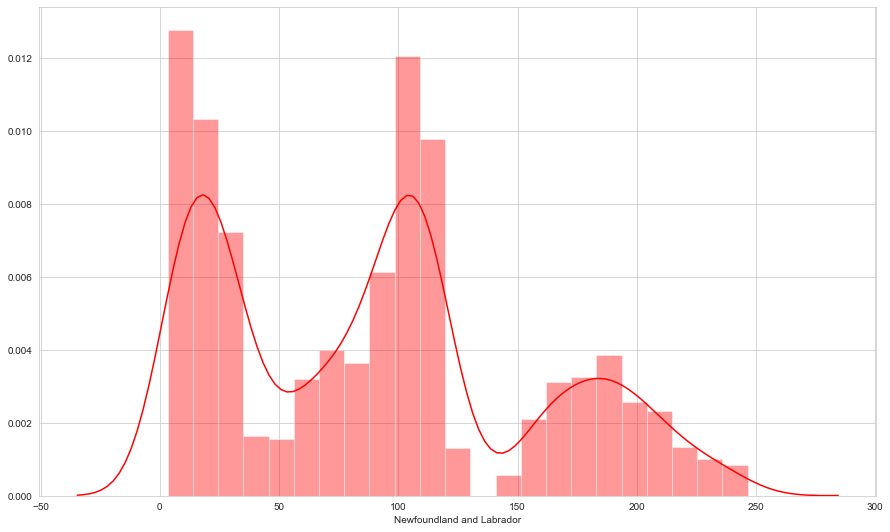

In [100]:
plt.figure(figsize=(15,9))
sns.distplot(df['Newfoundland and Labrador'],color='red')

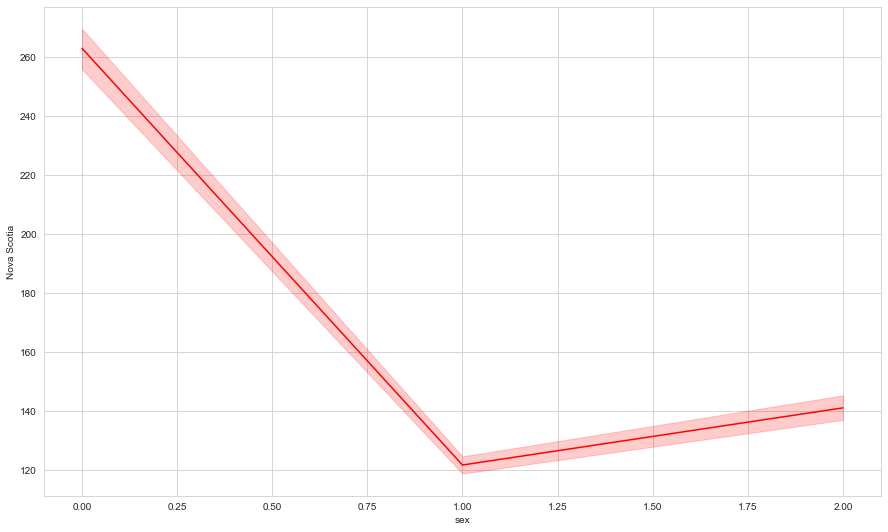

In [101]:
plt.figure(figsize=(15,9))
sns.lineplot(x='sex', y='Nova Scotia',data=df,color="red")

In [103]:
df.columns


Index(['variable', 'sex', 'Alberta', 'British Columbia', 'Manitoba',
       'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'sex by Alberta',
       'sex by British Columbia', 'sex by Manitoba'],
      dtype='object')

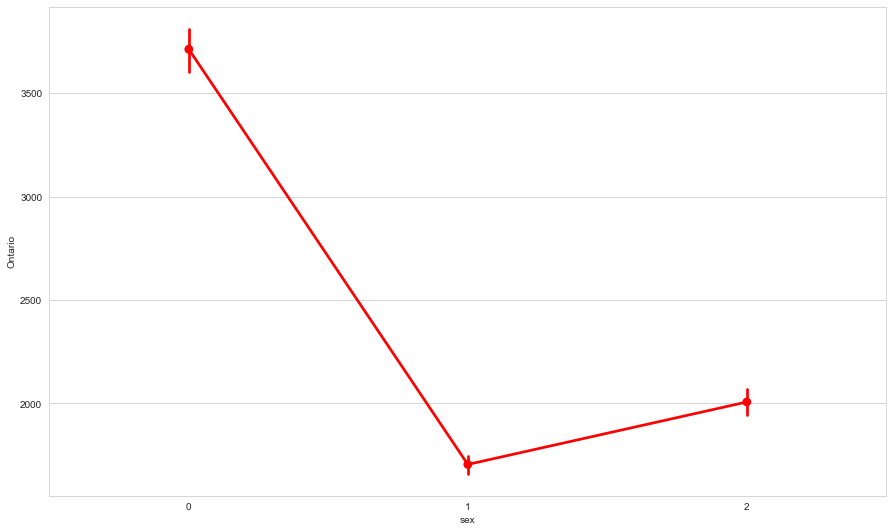

In [105]:
plt.figure(figsize=(15,9))
sns.pointplot(x='sex',y='Ontario',data=df,color='red')

<Figure size 1080x648 with 0 Axes>

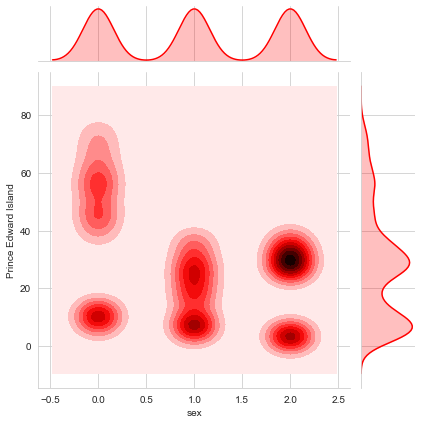

In [107]:
plt.figure(figsize=(15,9))
sns.jointplot(x='sex',y='Prince Edward Island',data=df,kind='kde',color='red')

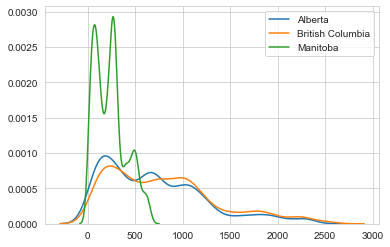

In [108]:
sns.kdeplot(df['Alberta'])
sns.kdeplot(df['British Columbia'])
sns.kdeplot(df['Manitoba'])

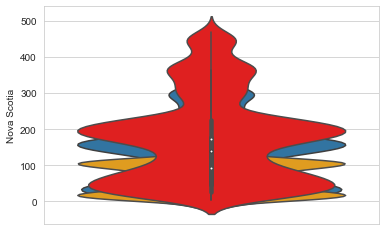

In [109]:
sns.violinplot(y="New Brunswick",data=df)
sns.violinplot(y="Newfoundland and Labrador",data=df,color='orange')
sns.violinplot(y="Nova Scotia",data=df,color='red')

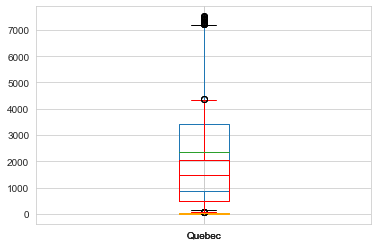

In [110]:
df.boxplot(column="Ontario")
df.boxplot(column="Prince Edward Island",color='orange')
df.boxplot(column="Quebec",color='red')

In [111]:
import sweetviz as sv

In [112]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [113]:
from IPython.display import IFrame

In [114]:
IFrame(src='Analyze.html',width=1000,height=600)

In [115]:
df.columns

Index(['variable', 'sex', 'Alberta', 'British Columbia', 'Manitoba',
       'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'sex by Alberta',
       'sex by British Columbia', 'sex by Manitoba'],
      dtype='object')

In [116]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [117]:
man=MinMaxScaler()
feat=[ 'sex', 'Alberta', 'British Columbia', 'Manitoba',
       'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'sex by Alberta',
       'sex by British Columbia', 'sex by Manitoba']
df[feat]=man.fit_transform(df[feat])
df[feat]

,sex,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan,sex by Alberta,sex by British Columbia,sex by Manitoba
0,0.0,0.338791,0.389795,0.642613,0.625209,0.654194,0.638877,0.483321,0.531613,0.574787,0.623612,0.25,0.5,0.333333
1,0.5,0.118575,0.133530,0.235258,0.220924,0.195312,0.219417,0.174178,0.193548,0.188590,0.204934,0.75,0.0,0.866667
2,1.0,0.206851,0.240347,0.386872,0.390651,0.445312,0.398781,0.289936,0.318710,0.370897,0.391189,0.75,1.0,0.733333
3,0.0,0.284726,0.329669,0.551986,0.547579,0.603207,0.557031,0.415778,0.460645,0.521513,0.522643,0.25,0.5,1.000000
4,0.5,0.080239,0.092277,0.165270,0.160824,0.159539,0.163474,0.127740,0.144516,0.153236,0.136916,0.50,0.0,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,0.5,0.325425,0.323286,0.324333,0.376461,0.340049,0.364606,0.347936,0.375484,0.349847,0.320881,0.25,0.5,1.000000
4739,1.0,0.473956,0.432467,0.453755,0.434057,0.412418,0.423378,0.443226,0.447742,0.434301,0.461498,1.00,0.5,0.666667
4740,0.0,0.165506,0.201340,0.171477,0.134112,0.138980,0.166086,0.170315,0.136774,0.172594,0.159295,0.75,1.0,0.000000
4741,0.5,0.110624,0.124232,0.105369,0.078742,0.088816,0.101654,0.101389,0.083871,0.100496,0.096211,0.75,0.0,0.866667


In [118]:
std=StandardScaler()
feat=[ 'sex', 'Alberta', 'British Columbia', 'Manitoba',
       'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'sex by Alberta',
       'sex by British Columbia', 'sex by Manitoba']
df[feat]=std.fit_transform(df[feat])
df[feat]

,sex,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan,sex by Alberta,sex by British Columbia,sex by Manitoba
0,-1.224745,0.215793,0.403297,1.144007,0.933094,1.111963,1.059313,0.705562,0.841691,0.994269,1.081486,-0.936287,0.142365,-0.593480
1,0.000000,-0.740610,-0.739586,-0.466223,-0.550199,-0.607457,-0.538644,-0.599945,-0.541300,-0.585943,-0.563625,0.630689,-1.145027,1.140618
2,1.224745,-0.357228,-0.263209,0.133090,0.072518,0.329288,0.144655,-0.111103,-0.029277,0.160008,0.168228,0.630689,1.429757,0.707094
3,-1.224745,-0.019015,0.135148,0.785769,0.648277,0.920916,0.747517,0.420328,0.551368,0.776289,0.684749,-0.936287,0.142365,1.574143
4,0.000000,-0.907104,-0.923565,-0.742875,-0.770703,-0.741498,-0.751760,-0.796055,-0.741886,-0.730599,-0.830887,-0.152799,-1.145027,-0.376718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,0.000000,0.157745,0.106682,-0.114119,0.020455,-0.065131,0.014463,0.133834,0.202981,0.073878,-0.108035,-0.936287,0.142365,1.574143
4739,1.224745,0.802813,0.593602,0.397474,0.231771,0.206032,0.238360,0.536242,0.498583,0.419440,0.444490,1.414177,0.142365,0.490331
4740,-1.224745,-0.536787,-0.437172,-0.718339,-0.868704,-0.818533,-0.741809,-0.616259,-0.773558,-0.651393,-0.742953,0.630689,1.429757,-1.677291
4741,0.000000,-0.775141,-0.781056,-0.979656,-1.071853,-1.006498,-0.987266,-0.907332,-0.989980,-0.946397,-0.990828,0.630689,-1.145027,1.140618
